In [1]:
!pip install opencv-python


You should consider upgrading via the 'c:\users\tagor\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


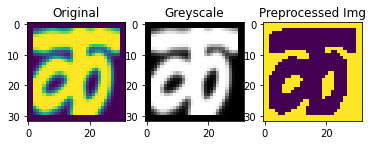

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov  4 17:10:20 2020

@author: Tagore Pothuneedi
@data pre-processing:PJ
"""

import matplotlib.pyplot as plt #to plot required plots
from skimage.transform import resize #to resize image 
from skimage.util import pad #to pad values in numpy array
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os #to get paths of images
import cv2 #to read images
from sklearn.decomposition import PCA


display=True
#function used to show the image
def show_image(image_path,title='Image',cmap_type='gray'):
    img_grey = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_grey,cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

# function to get all file paths from provided directory
def get_list_of_files(dir_path):
    # create a list of file and sub directories 
    # names in the given directory 
    files = os.listdir(dir_path)
    all_files = list()
    # Iterate over all the entries
    for file in files:
        # Create full path
        fullPath = os.path.join(dir_path, file)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            all_files = all_files + get_list_of_files(fullPath)
        else:
            all_files.append(fullPath)
                
    return all_files

#function to get folder names from provided path : folder name is later used as target label
def get_folder_name_list(dir_path):
   base_path_folder_list=[]
   for entry in os.listdir(dir_path):
       if os.path.isdir(os.path.join(dir_path, entry)):
           base_path_folder_list.append(entry) 
   return base_path_folder_list

#white padding : padwithone black padding:pad with zero
#used in preprocessing of image, for adding 2 pixel border from all sides
def padwithzeros(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 0
    vector[-pad_width[1]:] = 0
    return vector
def pre_process_image(img_path):
    #show_image(img_path,'greyimg')
    img_grey = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
        
    # define a threshold, 128 is the middle of black and white in grey scale
    thresh = 128
    
    # threshold the image
    img_binary = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)[1]
    
    #invert the binary image to get clear image
    inverted_binary_image =  cv2.bitwise_not(img_binary)
    fimg = np.where(inverted_binary_image>0,1,inverted_binary_image)
    
    
    '''
    # can be used when image is not 32 * 32 pixel 
    resized_img = resize(inverted_binary_image,(28,28),anti_aliasing=False) # second parameter : scale here 2 double the size
    resized_img_with_padding = pad(resized_img,2,padwithzeros)
    fimg = np.where(resized_img_with_padding>0,1,resized_img_with_padding)
    '''
    #normalized_fimg = fimg / np.linalg.norm(fimg)
    normalized_fimg = fimg 
    global display
    #filters
    #sobelx = cv2.Sobel(fimg,cv2.CV_64F,1,0,ksize=5)
    #sobely = cv2.Sobel(fimg,cv2.CV_64F,0,1,ksize=5)
    #laplacian = cv2.Laplacian(fimg,cv2.CV_64F)
    if display==True:
        import matplotlib.image as mpimg
        img=mpimg.imread(img_path)
        f, axarr = plt.subplots(1,3)
           
        axarr[0].imshow(img)
        axarr[0].set_title('Original')
        
        axarr[1].imshow(img_grey,cmap='gray')
        axarr[1].set_title('Greyscale')
        axarr[2].imshow(normalized_fimg)
        axarr[2].set_title('Preprocessed Img')
        #plt.title("Preprocessed Image of character_ka")
    display=False
    return normalized_fimg.flatten()

#get list of preprocessed images
def load_images_list(img_paths):
    images=[]
    for img_path in img_paths:
        fimg = pre_process_image(img_path)
        images.append(fimg)
    return images

# base path for dataset
base_path=r"C:\Users\tagor\Desktop\ml\DevanagariHandwrittenCharacterDataset\Train"



#base_path_folder_list = get_folder_name_list(base_path)    
#print(base_path_folder_list)


base_path_folder_list=['character_1_ka','character_2_kha','character_3_ga','character_4_gha','character_5_kna','character_6_cha',\
                       'character_7_chha','character_8_ja','character_9_jha','character_10_yna','character_11_taamatar','character_12_thaa',\
                      'character_13_daa','character_14_dhaa','character_15_adna','character_16_tabala','character_17_tha','character_18_da',\
                      'character_19_dha','character_20_na','character_21_pa','character_22_pha','character_23_ba','character_24_bha','character_25_ma',\
                      'character_26_yaw','character_27_ra','character_28_la','character_29_waw','character_30_motosaw','character_31_petchiryakha','character_32_patalosaw',\
        'character_33_ha','character_34_chhya','character_35_tra','character_36_gya']
#base_path_folder_list=['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']

df = pd.DataFrame()
i=1
for folder_name in base_path_folder_list:
    img_path=base_path+'/'+folder_name+'/'
    images_path_list = get_list_of_files(img_path)
    images_flattened = load_images_list(images_path_list)
    df_images = pd.DataFrame(images_flattened)
    df_images['label'] = i
    i+=1
    
    ##subdivide
    ##astract
    
    df=df.append(df_images,ignore_index=True)
    

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#shuffle records in df
df = df.sample(frac = 1) 
X=df.iloc[:,df.columns != 'label']
y=df['label']


X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.2,random_state=1111,stratify=y)


#testing random image
test_base_path = r'C:\Users\tagor\Desktop\ml\DevanagariHandwrittenCharacterDataset\Test'
test_img_path=test_base_path+'character_36_gya/44449.png'


def test_char(img_path):
    test_img = pre_process_image(img_path)
    test_img=test_img.reshape(1,-1)
    #print("rfc: {0}".format(rfc.predict(test_img)))
    #print("dtree_model: {0}".format(dtree_model.predict(test_img)))
    #print("svm_model_linear: {0}".format(svm_model_linear.predict(test_img)))
    #print("knn: {0}".format(knn.predict(test_img)))
    #print("gnb: {0}".format(gnb.predict(test_img)))
    
    



# Model

In [3]:

##################
#CNN 
##################
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from keras.layers.core import Activation
from keras.models import Sequential

import keras.backend as K
#from keras.backend.tensorflow_backend import get_session as sess


In [4]:
X_train.shape,X_test.shape
y_test.shape

(12240,)

In [5]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 32,32

# the data, split between train and test sets

x_train = np.asarray(X_train).reshape(48960,32,32,1)
x_test = np.asarray(X_test).reshape(12240,32,32,1)

#x_train = X_train
#x_test = X_test

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(np.asarray(y_train),37)
y_test = keras.utils.to_categorical(np.asarray(y_test),37)

x_train shape: (48960, 32, 32, 1)
48960 train samples
12240 test samples


In [6]:
from keras.backend import sigmoid,tanh,exp
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation

def swish(x, beta = 2):
    return (x * sigmoid(beta * x))
def param_tanh(x):
    return x+tanh(x)
def relu_moid(x):
    #if x > 0.0:
    #    return x
    #else:
    #    return 1/1+exp(-x)

    return K.switch(x>0,x,sigmoid(x))

def param_sigmoid(x):
    return x/(1+exp(-x))
    #print(x)
    
    

get_custom_objects().update({'swish': Activation(swish)})
get_custom_objects().update({'param_tanh': Activation(param_tanh)})
get_custom_objects().update({'relu_moid': Activation(relu_moid)})
get_custom_objects().update({'param_sigmoid': Activation(param_sigmoid)})

# Relu_moid

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu_moid',input_shape=(32,32,1)))
model.add(Conv2D(64, (3, 3), activation='relu_moid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu_moid'))
model.add(Dropout(0.5))
model.add(Dense(37, activation='softmax'))
list_of_scores={}
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [11]:
#optimizer=keras.optimizers.Adadelta(),
x_test.shape,y_test.shape,x_train.shape,y_train.shape

((12240, 32, 32, 1), (12240, 37), (48960, 32, 32, 1), (48960, 37))

Epoch 1/12
383/383 [==============================] - 62s 162ms/step - loss: 3.6275 - accuracy: 0.0254 - val_loss: 3.6026 - val_accuracy: 0.0267
Epoch 2/12
383/383 [==============================] - 62s 163ms/step - loss: 3.6001 - accuracy: 0.0270 - val_loss: 3.5975 - val_accuracy: 0.0278
Epoch 3/12
383/383 [==============================] - 63s 164ms/step - loss: 3.5959 - accuracy: 0.0258 - val_loss: 3.5942 - val_accuracy: 0.0278
Epoch 4/12
383/383 [==============================] - 63s 164ms/step - loss: 3.5931 - accuracy: 0.0263 - val_loss: 3.5918 - val_accuracy: 0.0278
Epoch 5/12
383/383 [==============================] - 63s 164ms/step - loss: 3.5920 - accuracy: 0.0266 - val_loss: 3.5901 - val_accuracy: 0.0278
Epoch 6/12
383/383 [==============================] - 60s 158ms/step - loss: 3.5897 - accuracy: 0.0249 - val_loss: 3.5889 - val_accuracy: 0.0278
Epoch 7/12
383/383 [==============================] - 64s 166ms/step - loss: 3.5886 - accuracy: 0.0265 - val_loss: 3.5879 - val_ac

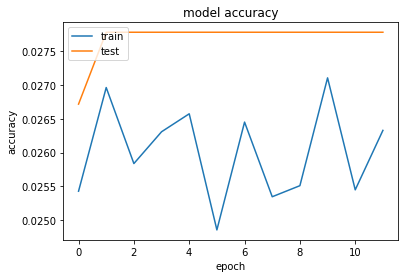

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
list_of_scores['relu_moid']=[]
list_of_scores['relu_moid'].append(score[1])
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# param_tanh

In [13]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3),activation='param_tanh',input_shape=(32,32,1)))
model1.add(Conv2D(64, (3, 3), activation='param_tanh'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(128, activation='param_tanh'))
model1.add(Dropout(0.5))
model1.add(Dense(37, activation='softmax'))


Epoch 1/12
383/383 [==============================] - 54s 142ms/step - loss: 1.6310 - accuracy: 0.5964 - val_loss: 0.5146 - val_accuracy: 0.8576
Epoch 2/12
383/383 [==============================] - 54s 140ms/step - loss: 0.6433 - accuracy: 0.8093 - val_loss: 0.3522 - val_accuracy: 0.8933
Epoch 3/12
383/383 [==============================] - 53s 138ms/step - loss: 0.4800 - accuracy: 0.8554 - val_loss: 0.3319 - val_accuracy: 0.8989
Epoch 4/12
383/383 [==============================] - 55s 144ms/step - loss: 0.4122 - accuracy: 0.8727 - val_loss: 0.3221 - val_accuracy: 0.9047
Epoch 5/12
383/383 [==============================] - 53s 139ms/step - loss: 0.3850 - accuracy: 0.8813 - val_loss: 0.3065 - val_accuracy: 0.9099
Epoch 6/12
383/383 [==============================] - 53s 139ms/step - loss: 0.3607 - accuracy: 0.8887 - val_loss: 0.3039 - val_accuracy: 0.9111
Epoch 7/12
383/383 [==============================] - 53s 137ms/step - loss: 0.3446 - accuracy: 0.8924 - val_loss: 0.3046 - val_ac

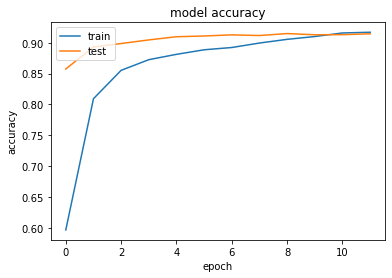

In [14]:
model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])
history=model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
list_of_scores['param_tanh']=[]
list_of_scores['param_tanh'].append(score[1])
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# param_sigmoid

In [15]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),activation='param_sigmoid',input_shape=(32,32,1)))
model2.add(Conv2D(64, (3, 3), activation='param_sigmoid'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='param_sigmoid'))
model2.add(Dropout(0.5))
model2.add(Dense(37, activation='softmax'))


Epoch 1/12
383/383 [==============================] - 67s 174ms/step - loss: 1.3432 - accuracy: 0.6232 - val_loss: 0.4084 - val_accuracy: 0.8908
Epoch 2/12
383/383 [==============================] - 69s 180ms/step - loss: 0.5531 - accuracy: 0.8334 - val_loss: 0.2604 - val_accuracy: 0.9250
Epoch 3/12
383/383 [==============================] - 67s 174ms/step - loss: 0.4031 - accuracy: 0.8743 - val_loss: 0.2166 - val_accuracy: 0.9386
Epoch 4/12
383/383 [==============================] - 68s 179ms/step - loss: 0.3234 - accuracy: 0.8980 - val_loss: 0.1831 - val_accuracy: 0.9459
Epoch 5/12
383/383 [==============================] - 68s 177ms/step - loss: 0.2828 - accuracy: 0.9093 - val_loss: 0.1669 - val_accuracy: 0.9501
Epoch 6/12
383/383 [==============================] - 67s 174ms/step - loss: 0.2516 - accuracy: 0.9199 - val_loss: 0.1583 - val_accuracy: 0.9542
Epoch 7/12
383/383 [==============================] - 68s 176ms/step - loss: 0.2187 - accuracy: 0.9273 - val_loss: 0.1539 - val_ac

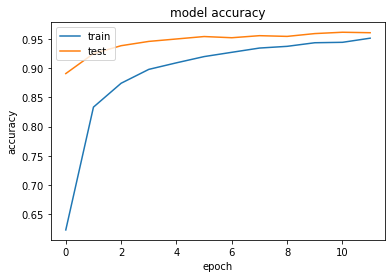

In [16]:
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])
history=model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
list_of_scores['param_sigmoid']=[]
list_of_scores['param_sigmoid'].append(score[1])
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Relu

In [17]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,1)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(37, activation='softmax'))


Epoch 1/12
383/383 [==============================] - 52s 136ms/step - loss: 1.8247 - accuracy: 0.4735 - val_loss: 0.5505 - val_accuracy: 0.8595
Epoch 2/12
383/383 [==============================] - 44s 115ms/step - loss: 0.9347 - accuracy: 0.7101 - val_loss: 0.3511 - val_accuracy: 0.9032
Epoch 3/12
383/383 [==============================] - 44s 115ms/step - loss: 0.7373 - accuracy: 0.7652 - val_loss: 0.2712 - val_accuracy: 0.9203
Epoch 4/12
383/383 [==============================] - 44s 115ms/step - loss: 0.6415 - accuracy: 0.7937 - val_loss: 0.2399 - val_accuracy: 0.9322
Epoch 5/12
383/383 [==============================] - 44s 116ms/step - loss: 0.5844 - accuracy: 0.8080 - val_loss: 0.2239 - val_accuracy: 0.9374
Epoch 6/12
383/383 [==============================] - 44s 115ms/step - loss: 0.5376 - accuracy: 0.8274 - val_loss: 0.2078 - val_accuracy: 0.9391
Epoch 7/12
383/383 [==============================] - 45s 117ms/step - loss: 0.4892 - accuracy: 0.8397 - val_loss: 0.1891 - val_ac

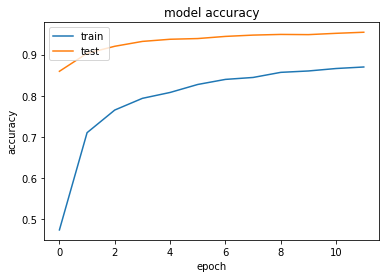

In [18]:
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])
history=model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
list_of_scores['relu']=[]
list_of_scores['relu'].append(score[1])
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# tanh

In [19]:
model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3),activation='tanh',input_shape=(32,32,1)))
model4.add(Conv2D(64, (3, 3), activation='tanh'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(128, activation='tanh'))
model4.add(Dropout(0.5))
model4.add(Dense(37, activation='softmax'))


Epoch 1/12
383/383 [==============================] - 46s 121ms/step - loss: 1.3399 - accuracy: 0.6314 - val_loss: 0.5594 - val_accuracy: 0.8553
Epoch 2/12
383/383 [==============================] - 46s 119ms/step - loss: 0.6116 - accuracy: 0.8265 - val_loss: 0.3679 - val_accuracy: 0.8977
Epoch 3/12
383/383 [==============================] - 46s 121ms/step - loss: 0.4571 - accuracy: 0.8658 - val_loss: 0.3066 - val_accuracy: 0.9158
Epoch 4/12
383/383 [==============================] - 47s 124ms/step - loss: 0.3755 - accuracy: 0.8897 - val_loss: 0.2761 - val_accuracy: 0.9203
Epoch 5/12
383/383 [==============================] - 47s 123ms/step - loss: 0.3391 - accuracy: 0.8971 - val_loss: 0.2579 - val_accuracy: 0.9253
Epoch 6/12
383/383 [==============================] - 47s 122ms/step - loss: 0.2978 - accuracy: 0.9086 - val_loss: 0.2538 - val_accuracy: 0.9269
Epoch 7/12
383/383 [==============================] - 47s 122ms/step - loss: 0.2721 - accuracy: 0.9166 - val_loss: 0.2451 - val_ac

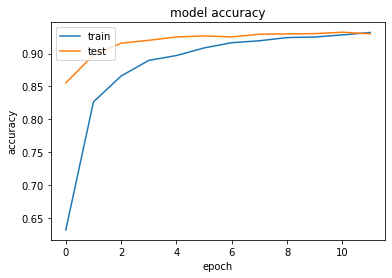

In [20]:
model4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])
history=model4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
list_of_scores['tanh']=[]
list_of_scores['tanh'].append(score[1])
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Sigmoid

In [21]:
model5 = Sequential()
model5.add(Conv2D(32, kernel_size=(3, 3),activation='sigmoid',input_shape=(32,32,1)))
model5.add(Conv2D(64, (3, 3), activation='sigmoid'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))
model5.add(Flatten())
model5.add(Dense(128, activation='sigmoid'))
model5.add(Dropout(0.5))
model5.add(Dense(37, activation='softmax'))


Epoch 1/12
383/383 [==============================] - 46s 121ms/step - loss: 3.6704 - accuracy: 0.0285 - val_loss: 3.5857 - val_accuracy: 0.0278
Epoch 2/12
383/383 [==============================] - 45s 119ms/step - loss: 3.6126 - accuracy: 0.0271 - val_loss: 3.5848 - val_accuracy: 0.0278
Epoch 3/12
383/383 [==============================] - 45s 118ms/step - loss: 3.5978 - accuracy: 0.0274 - val_loss: 3.5848 - val_accuracy: 0.0278
Epoch 4/12
383/383 [==============================] - 47s 123ms/step - loss: 3.5910 - accuracy: 0.0278 - val_loss: 3.5853 - val_accuracy: 0.0278
Epoch 5/12
383/383 [==============================] - 46s 121ms/step - loss: 3.5889 - accuracy: 0.0273 - val_loss: 3.5851 - val_accuracy: 0.0278
Epoch 6/12
383/383 [==============================] - 47s 122ms/step - loss: 3.5880 - accuracy: 0.0277 - val_loss: 3.5851 - val_accuracy: 0.0278
Epoch 7/12
383/383 [==============================] - 46s 121ms/step - loss: 3.5884 - accuracy: 0.0255 - val_loss: 3.5850 - val_ac

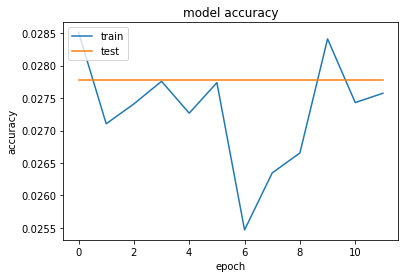

In [22]:
model5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])
history=model5.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
list_of_scores['sigmoid']=[]
list_of_scores['sigmoid'].append(score[1])
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Visualizing results

In [23]:

activation=list(list_of_scores.keys())
metrics=list(list_of_scores.values())

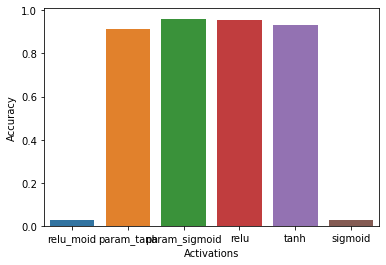

In [24]:
import seaborn as sns
ax=sns.barplot(x=activation,y=[item[0] for item in metrics])
ax.set(xlabel='Activations', ylabel='Accuracy')
plt.show()

In [25]:
list_of_scores

{'relu_moid': [0.02777777798473835],
 'param_tanh': [0.9146241545677185],
 'param_sigmoid': [0.9607843160629272],
 'relu': [0.9544934630393982],
 'tanh': [0.9301470518112183],
 'sigmoid': [0.02777777798473835]}